## Exploratory Data Analysis

The Department of Education in an effort to protect the privacy of students allows schools to report graduation results in a range for smaller graduation classes. The range is widest for the smallest schools (greater or less than 50% for classes with 6 to 15 students) and narrowest (five percentile points for classes with 61 to 300 students), classes with 301 or more report a single graduation number, not a range. Classes with five or fewer students do not report any number. Because the target variable is the graduation rate, any school that did not report a rate was dropped from the data set. 

Because of the graduation range issue, it seemed important to examine if there are significant differences between big and small schools. They seemed similar enough to try and develop a model using just large schools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data from Building_Features notebook
clean_combo = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/combo_cleaned.csv')

In [3]:
clean_combo.head()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,92,AL,ALABAMA,...,220.0,0.169884,78.0,0.060232,0.0,0.000000,2811.937359,0.0,0.003475,0.378788
1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,GE95,AL,ALABAMA,...,175.0,0.324675,10.0,0.018553,2.0,0.003711,4825.189777,0.0,0.002783,0.100000
2,2,2,ALABAMA,Marshall County,10000600878,Douglas High Sch,153,85-89,AL,ALABAMA,...,229.0,0.385522,18.0,0.030303,5.0,0.008418,5317.932795,0.0,0.001684,0.105263
3,3,3,ALABAMA,Marshall County,10000600883,Kate D Smith DAR High Sch,120,80-84,AL,ALABAMA,...,241.0,0.525054,10.0,0.021786,0.0,0.000000,5909.375686,0.0,0.002179,0.068966
4,4,4,ALABAMA,Marshall County,10000601585,Brindlee Mt High Sch,94,85-89,AL,ALABAMA,...,64.0,0.176309,8.0,0.022039,0.0,0.000000,3962.305785,0.0,0.002755,0.101010


In [4]:
columns = clean_combo.columns
for col in columns:
    print(col)

Unnamed: 0
Unnamed: 0.1
STNAM
LEANM
NCESSCH
SCHNAM
ALL_COHORT_1516
ALL_RATE_1516
LEA_STATE
LEA_STATE_NAME
LEAID_y
LEA_NAME
SCHID
SCH_NAME
COMBOKEY
JJ
SCH_STATUS_SPED
SCH_STATUS_MAGNET
SCH_STATUS_CHARTER
SCH_STATUS_ALT
SCH_MAGNETDETAIL
SCH_ALTFOCUS
TOT_ENR_M
TOT_ENR_F
TOT_GTENR_M
TOT_GTENR_F
TOT_DUAL_M
TOT_DUAL_F
TOT_ALGENR_GS0910_M
TOT_ALGENR_GS0910_F
TOT_ALGENR_GS1112_M
TOT_ALGENR_GS1112_F
TOT_ALGPASS_GS0910_M
TOT_ALGPASS_GS0910_F
TOT_ALGPASS_GS1112_M
TOT_ALGPASS_GS1112_F
TOT_GEOM_M
TOT_GEOM_F
TOT_MATHENR_ALG2_M
TOT_MATHENR_ALG2_F
TOT_MATHENR_CALC_M
TOT_MATHENR_CALC_F
TOT_MATHENR_ADVM_M
TOT_MATHENR_ADVM_F
TOT_SCIENR_BIOL_M
TOT_SCIENR_BIOL_F
TOT_SCIENR_CHEM_M
TOT_SCIENR_CHEM_F
TOT_SCIENR_PHYS_M
TOT_SCIENR_PHYS_F
TOT_APENR_M
TOT_APENR_F
TOT_IBENR_M
TOT_IBENR_F
TOT_SATACT_M
TOT_SATACT_F
TOT_DAYSMISSED_M
TOT_DAYSMISSED_F
SCH_HBALLEGATIONS_SEX
SCH_HBALLEGATIONS_RAC
SCH_HBALLEGATIONS_DIS
SCH_HBALLEGATIONS_ORI
SCH_HBALLEGATIONS_REL
TOT_ABSENT_M
TOT_ABSENT_F
SCH_SSPART_M
SCH_SSPART_F
TOT_SSPA

## Explore the Data - Look at Each Variable for Patterns

In [26]:
#explore the enrollment which will reflect the graduation class size
clean_combo['total_enrollment'].describe()

count    21866.000000
mean       705.160706
std        748.701962
min          2.000000
25%        161.000000
50%        428.000000
75%       1045.000000
max      14164.000000
Name: total_enrollment, dtype: float64

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


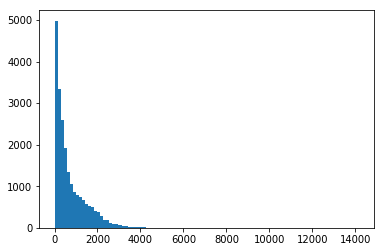

In [7]:
plt.hist(clean_combo['total_enrollment'], bins=100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


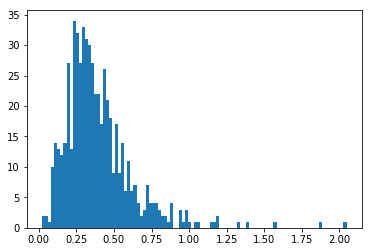

In [8]:
plt.hist(clean_combo['ap_ib_de_rate'], bins =100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


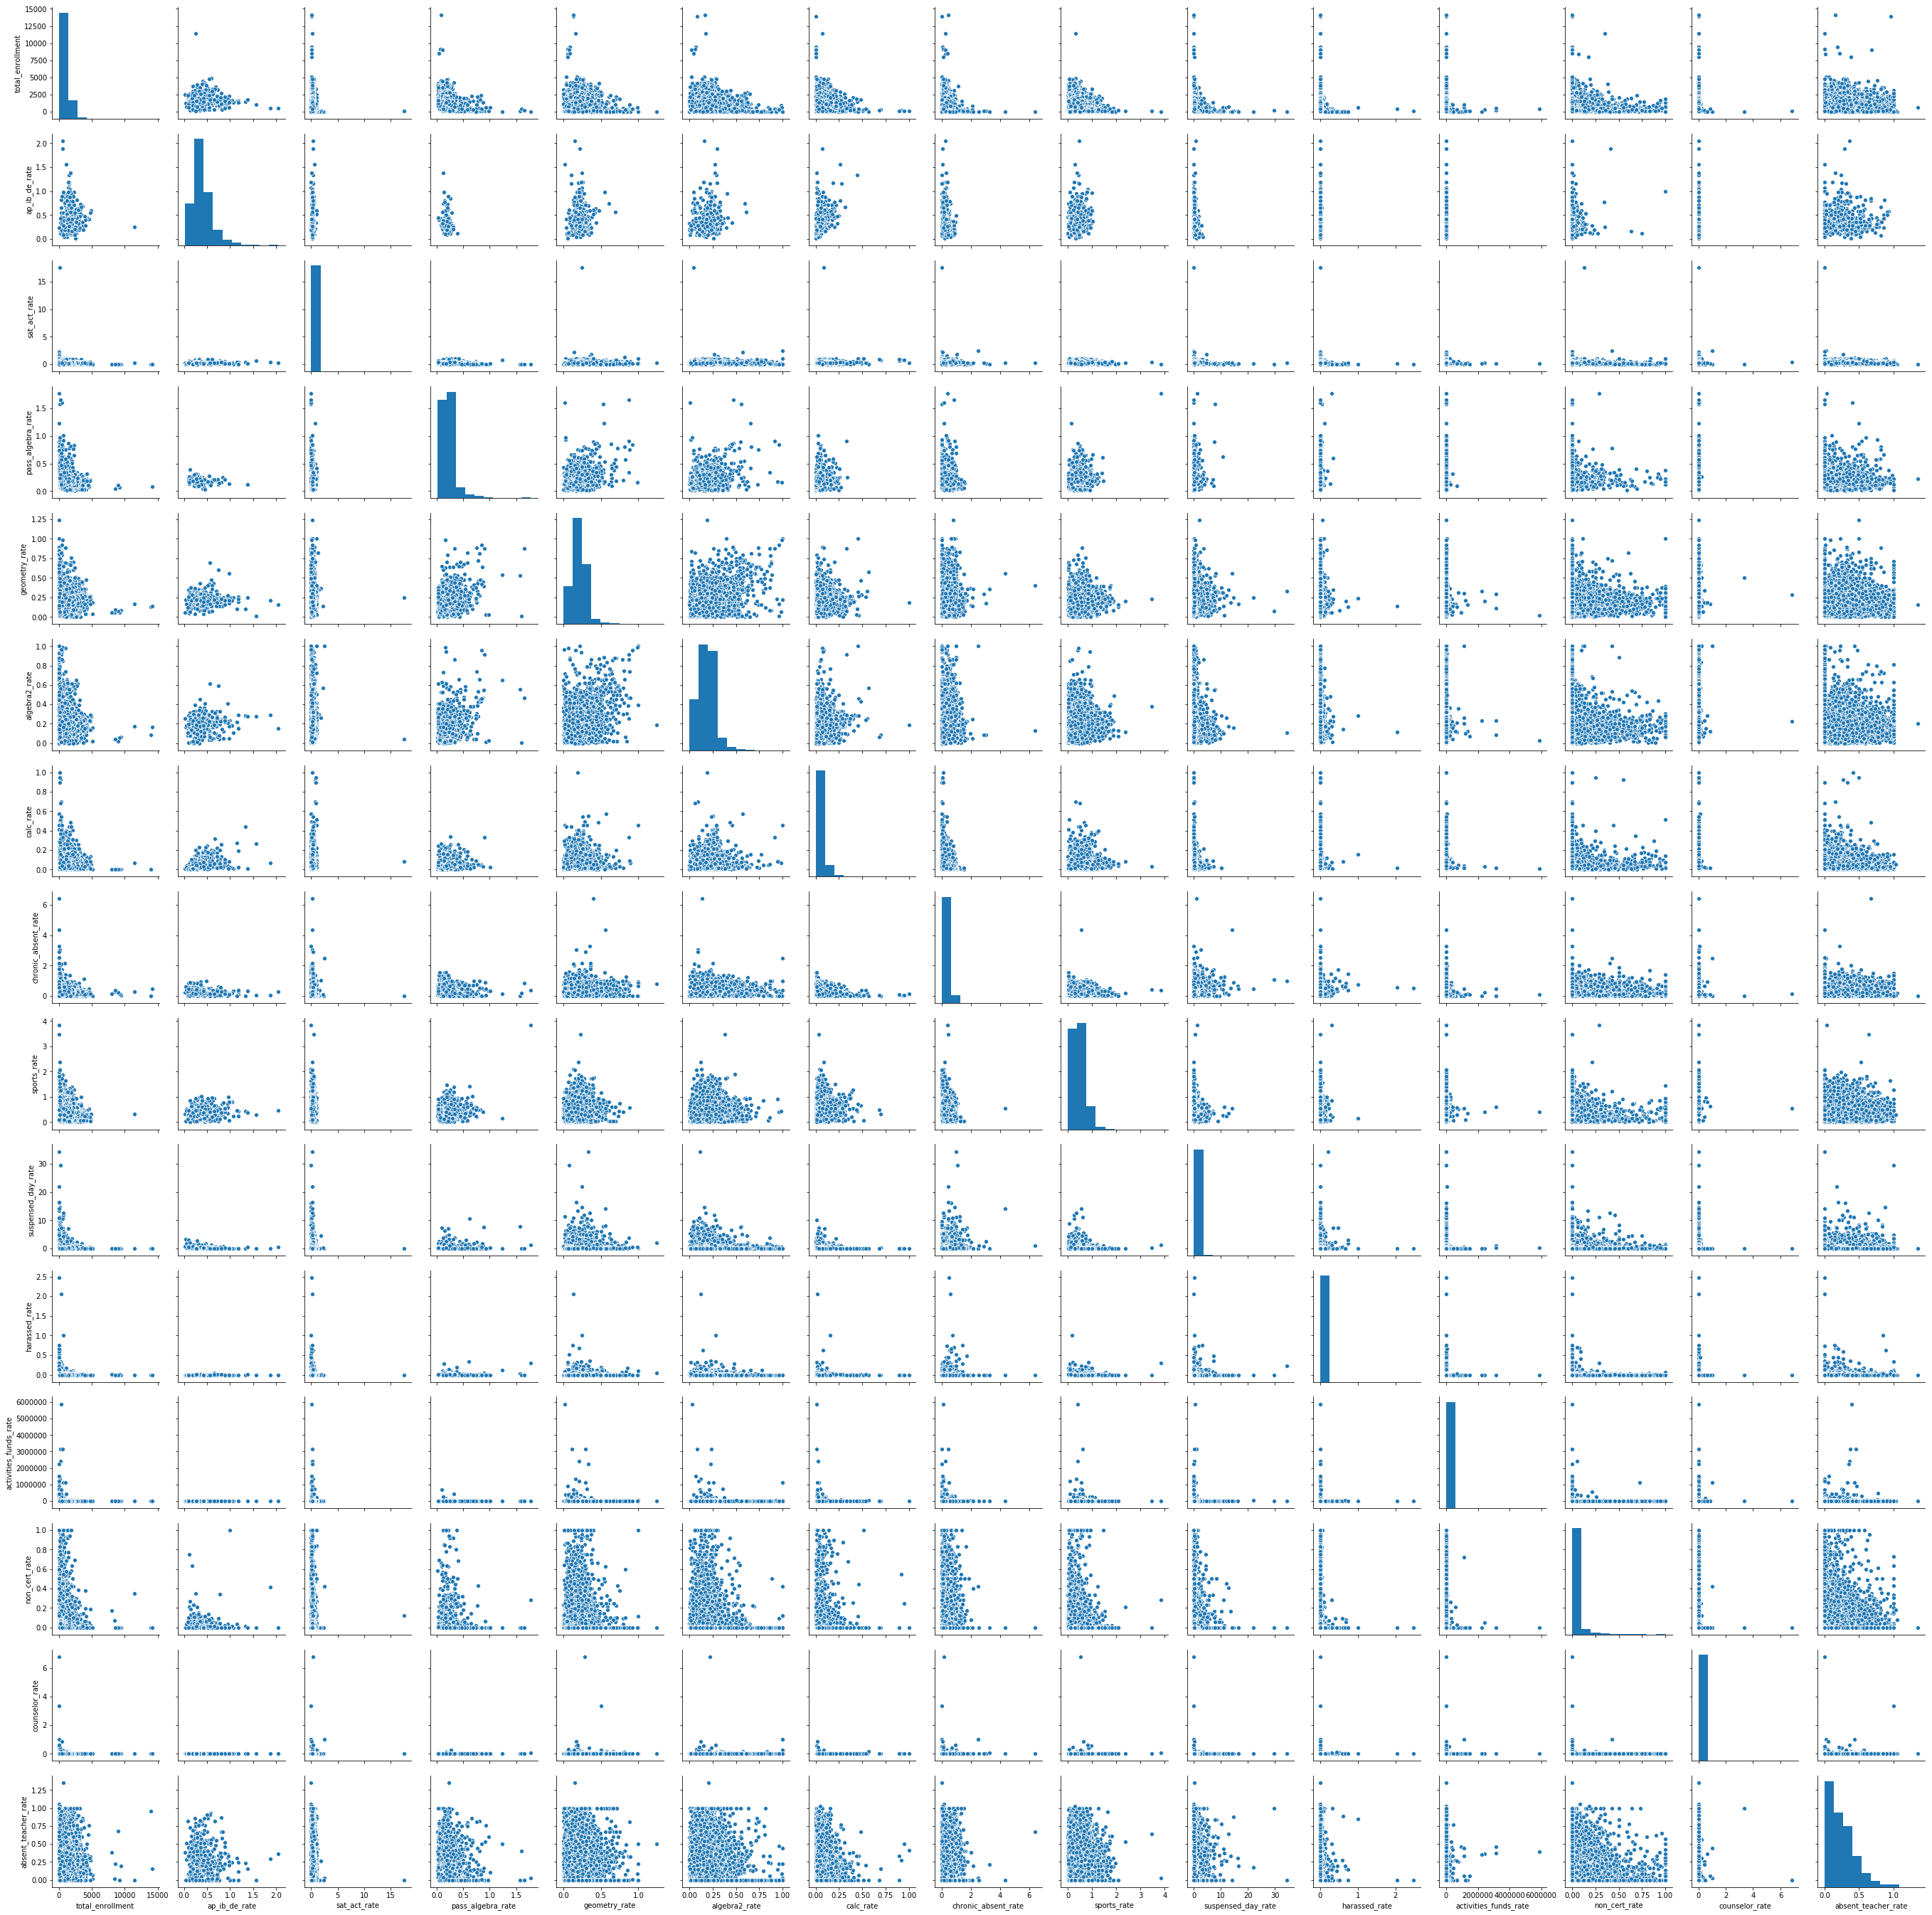

In [9]:
combo_eda = clean_combo[['total_enrollment', 'ap_ib_de_rate', 'sat_act_rate',
                        'pass_algebra_rate','geometry_rate','algebra2_rate',
                        'calc_rate','chronic_absent_rate','sports_rate',
                        'suspensed_day_rate','harassed_rate','activities_funds_rate', 
                        'non_cert_rate', 'counselor_rate', 'absent_teacher_rate']]
sns.pairplot(combo_eda)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


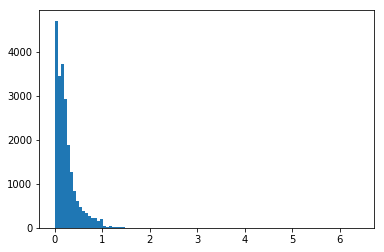

In [10]:
plt.hist(clean_combo['chronic_absent_rate'], bins =100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


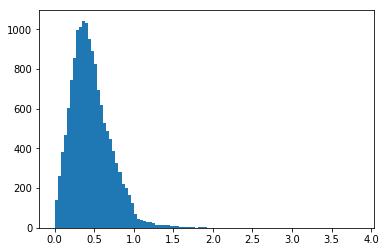

In [11]:
plt.hist(clean_combo['sports_rate'], bins =100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


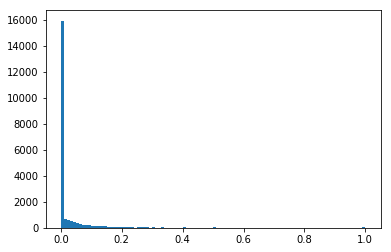

In [12]:
plt.hist(clean_combo['non_cert_rate'], bins =100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


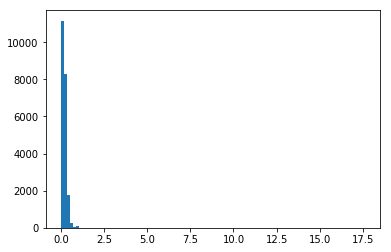

In [13]:
plt.hist(clean_combo['sat_act_rate'], bins =100)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


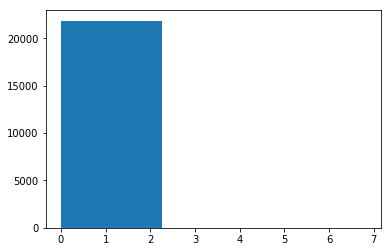

In [17]:
plt.hist(clean_combo['counselor_rate'],bins=3)
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


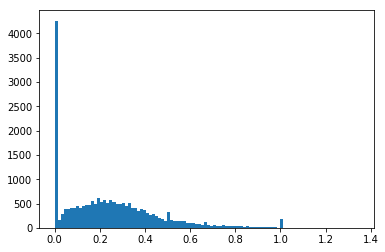

In [18]:
plt.hist(clean_combo['absent_teacher_rate'], bins =100)
plt.show()

## Divide data set into large and small schools 
For privacy reasons, graduation rates in small high schools are masked using a graduation range rather than a specific number. A range is used when the Adjusted Cohort Graduation Rate is 300 or fewer students. The smaller the graduation class the wider the range. A total of 38 different ranges are available.

Schools were divided into large and small schools based on this metric and then more exploratory data visualizations were plotted.

In [4]:
small = clean_combo[clean_combo['ALL_COHORT_1516'] <= 300]
large = clean_combo[clean_combo['ALL_COHORT_1516'] > 300]

In [5]:
small.head()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,92,AL,ALABAMA,...,220.0,0.169884,78.0,0.060232,0.0,0.000000,2811.937359,0.0,0.003475,0.378788
1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,GE95,AL,ALABAMA,...,175.0,0.324675,10.0,0.018553,2.0,0.003711,4825.189777,0.0,0.002783,0.100000
2,2,2,ALABAMA,Marshall County,10000600878,Douglas High Sch,153,85-89,AL,ALABAMA,...,229.0,0.385522,18.0,0.030303,5.0,0.008418,5317.932795,0.0,0.001684,0.105263
3,3,3,ALABAMA,Marshall County,10000600883,Kate D Smith DAR High Sch,120,80-84,AL,ALABAMA,...,241.0,0.525054,10.0,0.021786,0.0,0.000000,5909.375686,0.0,0.002179,0.068966
4,4,4,ALABAMA,Marshall County,10000601585,Brindlee Mt High Sch,94,85-89,AL,ALABAMA,...,64.0,0.176309,8.0,0.022039,0.0,0.000000,3962.305785,0.0,0.002755,0.101010


In [21]:
large.tail()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
21798,21798,21798,WYOMING,Laramie County School District #1,560198000090,Central High School,301,93,WY,WYOMING,...,595.0,0.530776,58.0,0.051740,0.0,0.000000,6686.227939,0.000000,0.003970,0.726080
21799,21799,21799,WYOMING,Laramie County School District #1,560198000091,East High School,365,84,WY,WYOMING,...,538.0,0.372318,190.0,0.131488,0.0,0.000000,5316.592900,0.000000,0.003599,0.636884
21838,21838,21838,WYOMING,Natrona County School District #1,560451000229,Kelly Walsh High School,416,76,WY,WYOMING,...,44.0,0.026036,312.0,0.184615,8.0,0.004734,801.806734,0.000000,0.002959,0.271630
21839,21839,21839,WYOMING,Natrona County School District #1,560451000231,Natrona County High School,432,81,WY,WYOMING,...,62.0,0.039541,152.0,0.096939,4.0,0.002551,723.983533,0.010101,0.003189,0.222222
21852,21852,21852,WYOMING,Sweetwater County School District #1,560530200294,Rock Springs High School,340,79,WY,WYOMING,...,574.0,0.409415,280.0,0.199715,0.0,0.000000,900.954650,0.000000,0.002853,0.456595


In [22]:
large.describe()

,Unnamed: 0,Unnamed: 0.1,NCESSCH,ALL_COHORT_1516,LEAID_y,SCHID,COMBOKEY,TOT_ENR_M,TOT_ENR_F,TOT_GTENR_M,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
count,4285.000000,4285.000000,4.285000e+03,4285.000000,4.285000e+03,4285.000000,4.285000e+03,4285.000000,4285.000000,2961.000000,...,4137.000000,4137.000000,4283.000000,4283.000000,4249.000000,4249.000000,3960.000000,4277.000000,4285.000000,4277.000000
mean,10605.746558,10605.746558,2.689619e+11,463.257643,2.689619e+06,2680.868145,2.689619e+11,974.942824,939.359160,124.982101,...,693.379502,0.377472,390.380107,0.218497,3.004472,0.001687,1747.673586,0.022451,0.003028,0.285042
std,6597.161629,6597.161629,1.669878e+11,161.960028,1.669878e+06,3214.185840,1.669878e+11,351.896095,361.999619,117.866530,...,336.144594,0.178794,541.711834,0.322440,9.587968,0.005315,6643.224330,0.067861,0.001918,0.174455
min,5.000000,5.000000,1.000070e+10,301.000000,1.000070e+05,1.000000,1.000070e+10,0.000000,43.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4698.000000,4698.000000,1.200390e+11,357.000000,1.200390e+06,696.000000,1.200390e+11,753.000000,723.000000,49.000000,...,481.000000,0.260563,82.000000,0.046078,0.000000,0.000000,416.902680,0.000000,0.002340,0.172712
50%,9905.000000,9905.000000,2.616410e+11,429.000000,2.616410e+06,1585.000000,2.616410e+11,911.000000,875.000000,91.000000,...,658.000000,0.357931,214.000000,0.117266,0.000000,0.000000,786.985161,0.000000,0.002826,0.267488
75%,17069.000000,17069.000000,4.217010e+11,523.000000,4.217010e+06,3629.000000,4.217010e+11,1116.000000,1074.000000,159.000000,...,868.000000,0.466591,482.000000,0.264181,3.000000,0.001619,1566.658187,0.021277,0.003482,0.374640
max,21852.000000,21852.000000,5.605302e+11,4713.000000,5.605302e+06,90441.000000,5.605300e+11,6713.000000,7733.000000,987.000000,...,3700.000000,1.396507,9606.000000,6.991266,237.000000,0.109671,371164.320082,1.000000,0.066745,1.000000


In [11]:
clean_combo[clean_combo['ALL_RATE_1516'] == '100'].sum()

Unnamed: 0               0.0
Unnamed: 0.1             0.0
STNAM                    0.0
LEANM                    0.0
NCESSCH                  0.0
SCHNAM                   0.0
ALL_COHORT_1516          0.0
ALL_RATE_1516            0.0
LEA_STATE                0.0
LEA_STATE_NAME           0.0
LEAID_y                  0.0
LEA_NAME                 0.0
SCHID                    0.0
SCH_NAME                 0.0
COMBOKEY                 0.0
JJ                       0.0
SCH_STATUS_SPED          0.0
SCH_STATUS_MAGNET        0.0
SCH_STATUS_CHARTER       0.0
SCH_STATUS_ALT           0.0
SCH_MAGNETDETAIL         0.0
SCH_ALTFOCUS             0.0
TOT_ENR_M                0.0
TOT_ENR_F                0.0
TOT_GTENR_M              0.0
TOT_GTENR_F              0.0
TOT_DUAL_M               0.0
TOT_DUAL_F               0.0
TOT_ALGENR_GS0910_M      0.0
TOT_ALGENR_GS0910_F      0.0
                        ... 
SCH_FTETEACH_NOTCERT     0.0
SCH_FTECOUNSELORS        0.0
SCH_FTETEACH_ABSENT      0.0
districtID    

In [23]:
small.describe()

,Unnamed: 0,Unnamed: 0.1,NCESSCH,ALL_COHORT_1516,LEAID_y,SCHID,COMBOKEY,TOT_ENR_M,TOT_ENR_F,TOT_GTENR_M,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
count,17582.000000,17582.000000,1.758200e+04,17582.000000,1.758200e+04,17582.000000,1.758200e+04,17581.000000,17581.000000,7963.000000,...,10945.000000,10945.000000,17543.000000,17543.000000,17483.000000,17483.000000,1.686300e+04,17229.000000,17578.000000,17229.000000
mean,11012.756626,11012.756626,2.803562e+11,87.803720,2.803562e+06,2882.948356,2.803562e+11,210.509072,199.948808,26.289841,...,240.569849,0.491380,106.406772,0.270791,1.274667,0.004094,5.947972e+03,0.035783,0.005708,0.233425
std,6238.879485,6238.879485,1.579465e+11,79.274471,1.579465e+06,3595.143910,1.579465e+11,184.861686,181.625427,39.663878,...,197.829131,0.270899,297.619842,0.834418,8.814266,0.033304,6.911202e+04,0.111344,0.060099,0.220391
min,0.000000,0.000000,1.000050e+10,1.000000,1.000050e+05,1.000000,1.000050e+10,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,5859.250000,5859.250000,1.304508e+11,24.000000,1.304508e+06,681.000000,1.304508e+11,66.000000,57.000000,5.000000,...,91.000000,0.295824,0.000000,0.000000,0.000000,0.000000,6.404098e+02,0.000000,0.001970,0.035714
50%,11045.500000,11045.500000,2.728185e+11,62.000000,2.728185e+06,1619.000000,2.728185e+11,157.000000,150.000000,14.000000,...,184.000000,0.463333,18.000000,0.055077,0.000000,0.000000,1.545346e+03,0.000000,0.003275,0.198413
75%,16265.750000,16265.750000,4.028635e+11,132.000000,4.028635e+06,3681.750000,4.028635e+11,312.000000,296.000000,32.000000,...,343.000000,0.655172,86.000000,0.216216,0.000000,0.000000,4.083182e+03,0.000000,0.005000,0.357143
max,21866.000000,21866.000000,5.606240e+11,300.000000,5.606240e+06,90469.000000,5.606240e+11,4080.000000,3929.000000,1008.000000,...,1639.000000,3.846154,8770.000000,34.444444,760.000000,2.473684,5.882562e+06,1.000000,6.809524,1.348315


In [33]:
small[(small['ALL_COHORT_1516'] <= 300) & (small['ALL_COHORT_1516']>60)].count()

Unnamed: 0               8914
Unnamed: 0.1             8914
STNAM                    8914
LEANM                    8914
NCESSCH                  8914
SCHNAM                   8914
ALL_COHORT_1516          8914
ALL_RATE_1516            8914
LEA_STATE                8914
LEA_STATE_NAME           8914
LEAID_y                  8914
LEA_NAME                 8914
SCHID                    8914
SCH_NAME                 8914
COMBOKEY                 8914
JJ                       8914
SCH_STATUS_SPED          8914
SCH_STATUS_MAGNET        8914
SCH_STATUS_CHARTER       8914
SCH_STATUS_ALT           8914
SCH_MAGNETDETAIL         8559
SCH_ALTFOCUS             8561
TOT_ENR_M                8914
TOT_ENR_F                8914
TOT_GTENR_M              4873
TOT_GTENR_F              4873
TOT_DUAL_M               6235
TOT_DUAL_F               6235
TOT_ALGENR_GS0910_M      8420
TOT_ALGENR_GS0910_F      8420
                         ... 
SCH_FTETEACH_NOTCERT     8913
SCH_FTECOUNSELORS        8913
SCH_FTETEA

## Data Cleaning on Large High Schools
More than 140 large schools, provided a graduation rate of more than 99% or GE99. Those were converted to 100. Others provided less than 1, and were converted to zero. The graduation rate was a string and converted to an integer.

In [41]:
large.replace(['GE99'], '100', inplace=True)
large.replace(['LE1'], '0', inplace=True)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [44]:
large['ALL_RATE_1516'] = large['ALL_RATE_1516'].apply(int)
large['ALL_RATE_1516'].unique()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([ 92,  94,  97,  96,  89,  87,  75,  91,  80,  79,  77,  90,  88,
        95,  82,  93,  83,  78,  86,  76,  73,  66,  98,  85,  33,  24,
        14,  19,  84,  81, 100,  22,  46,  15,  69,  37,  56,  30,  29,
        40,  72,  51,  61,  38,  49,  45,  64,  35,  74,  21,  58,  48,
        71,  39,  63,  57,  67,   9,   4,  11,  65,   3,  70,  17,  34,
         6,  60,  13,  59,  68,   0,  32,  62,  55,  52,  25,  20,  27,
        53,  41,  47,  23,  28])

In [38]:
large.head()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,92,AL,ALABAMA,...,898.0,0.302663,160.0,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651
7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,94,AL,ALABAMA,...,526.0,0.313655,232.0,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870
8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,97,AL,ALABAMA,...,565.0,0.321754,72.0,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608
9,9,9,ALABAMA,Madison City,10000802198,James Clemens High School,404,96,AL,ALABAMA,...,280.0,0.163934,134.0,0.078454,0.0,0.000000,3478.029292,0.000000,0.002635,0.232804
12,12,12,ALABAMA,Trussville City,10001301682,Hewitt-Trussville High Sch,381,96,AL,ALABAMA,...,799.0,0.554476,28.0,0.019431,2.0,0.001388,3970.929743,0.000000,0.002082,0.231027


## Exploratory Data Analysis on Large & Small High Schools

Note that the y-axis on the large and small schools is different.

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


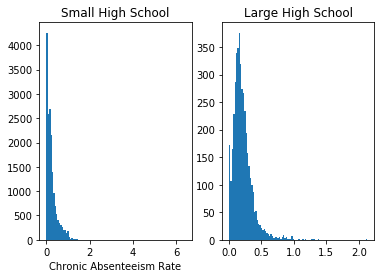

In [45]:
plt.subplot(1,2,1)
plt.hist(small['chronic_absent_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Chronic Absenteeism Rate')
plt.subplot(1,2,2)
plt.hist(large['chronic_absent_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


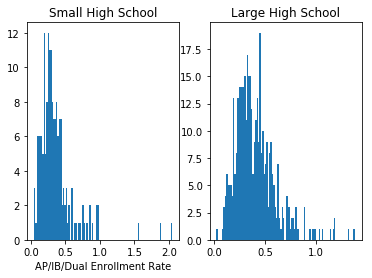

In [46]:
plt.subplot(1,2,1)
plt.hist(small['ap_ib_de_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('AP/IB/Dual Enrollment Rate')
plt.subplot(1,2,2)
plt.hist(large['ap_ib_de_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


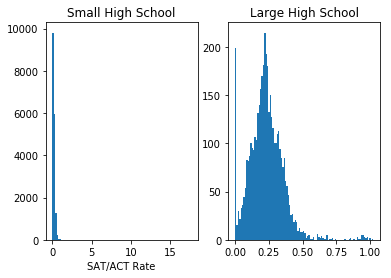

In [47]:
plt.subplot(1,2,1)
plt.hist(small['sat_act_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('SAT/ACT Rate')
plt.subplot(1,2,2)
plt.hist(large['sat_act_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


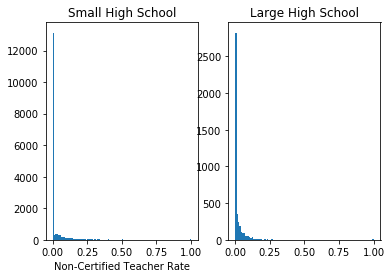

In [48]:
plt.subplot(1,2,1)
plt.hist(small['non_cert_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Non-Certified Teacher Rate')
plt.subplot(1,2,2)
plt.hist(large['non_cert_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


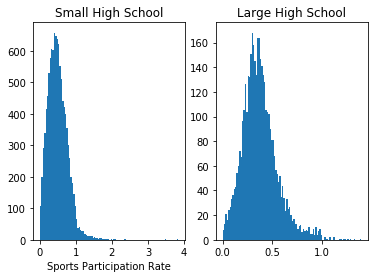

In [49]:
plt.subplot(1,2,1)
plt.hist(small['sports_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Sports Participation Rate')
plt.subplot(1,2,2)
plt.hist(large['sports_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


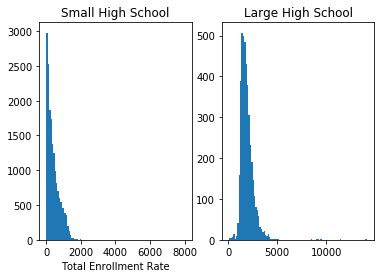

In [50]:
plt.subplot(1,2,1)
plt.hist(small['total_enrollment'], bins = 100)
plt.title('Small High School')
plt.xlabel('Total Enrollment Rate')
plt.subplot(1,2,2)
plt.hist(large['total_enrollment'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


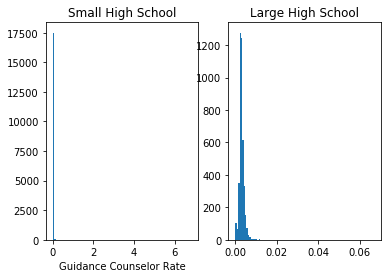

In [51]:
plt.subplot(1,2,1)
plt.hist(small['counselor_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Guidance Counselor Rate')
plt.subplot(1,2,2)
plt.hist(large['counselor_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


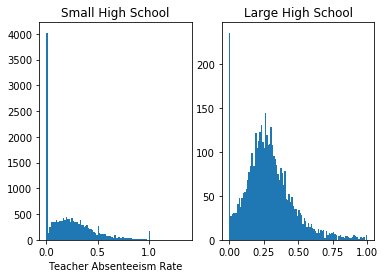

In [52]:
plt.subplot(1,2,1)
plt.hist(small['absent_teacher_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Teacher Absenteeism Rate')
plt.subplot(1,2,2)
plt.hist(large['absent_teacher_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


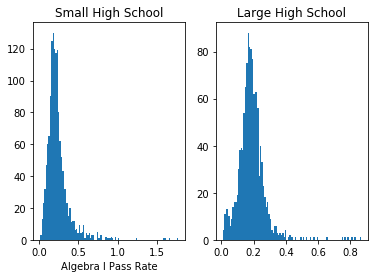

In [53]:
plt.subplot(1,2,1)
plt.hist(small['pass_algebra_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Algebra I Pass Rate')
plt.subplot(1,2,2)
plt.hist(large['pass_algebra_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


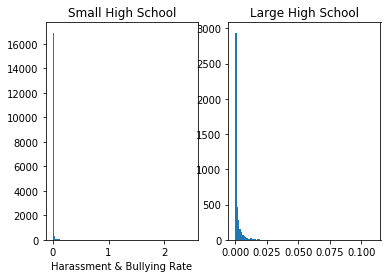

In [54]:
plt.subplot(1,2,1)
plt.hist(small['harassed_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Harassment & Bullying Rate')
plt.subplot(1,2,2)
plt.hist(large['harassed_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


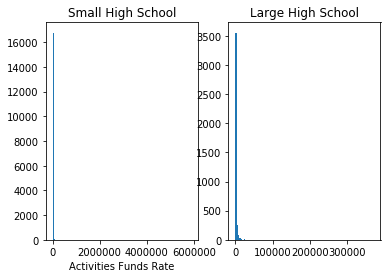

In [55]:
plt.subplot(1,2,1)
plt.hist(small['activities_funds_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Activities Funds Rate')
plt.subplot(1,2,2)
plt.hist(large['activities_funds_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


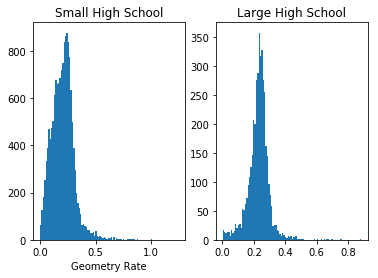

In [56]:
plt.subplot(1,2,1)
plt.hist(small['geometry_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Geometry Rate')
plt.subplot(1,2,2)
plt.hist(large['geometry_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


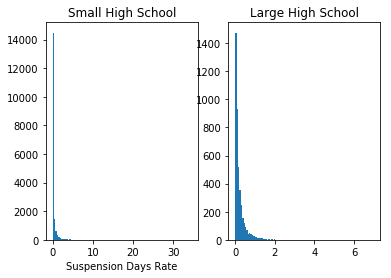

In [57]:
plt.subplot(1,2,1)
plt.hist(small['suspensed_day_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Suspension Days Rate')
plt.subplot(1,2,2)
plt.hist(large['suspensed_day_rate'], bins = 100)
plt.title('Large High School')
plt.show()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


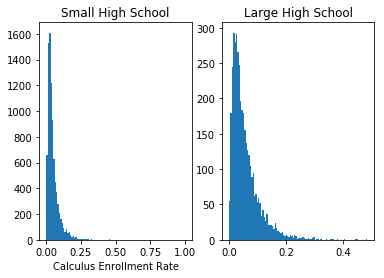

In [58]:
plt.subplot(1,2,1)
plt.hist(small['calc_rate'], bins = 100)
plt.title('Small High School')
plt.xlabel('Calculus Enrollment Rate')
plt.subplot(1,2,2)
plt.hist(large['calc_rate'], bins = 100)
plt.title('Large High School')
plt.show()

## Correlation Heat Maps Were Plotted to See Which Variables have a Relationship

In [59]:
small_corr = small[['total_enrollment', 'ap_ib_de_rate', 'sat_act_rate', 'pass_algebra_rate',
      'geometry_rate', 'algebra2_rate', 'calc_rate', 'chronic_absent_rate',
      'sports_rate', 'suspensed_day_rate', 'harassed_rate','activities_funds_rate',
      'non_cert_rate','counselor_rate','absent_teacher_rate']].corr()

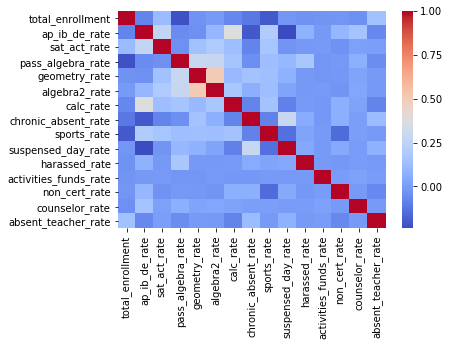

In [60]:
sns.heatmap(small_corr, cmap ='coolwarm')

In [64]:
large_corr = large[['ALL_RATE_1516', 'total_enrollment', 'ap_ib_de_rate', 'sat_act_rate', 'pass_algebra_rate',
      'geometry_rate', 'algebra2_rate', 'calc_rate', 'chronic_absent_rate',
      'sports_rate', 'suspensed_day_rate', 'harassed_rate','activities_funds_rate',
      'non_cert_rate','counselor_rate','absent_teacher_rate']].corr()

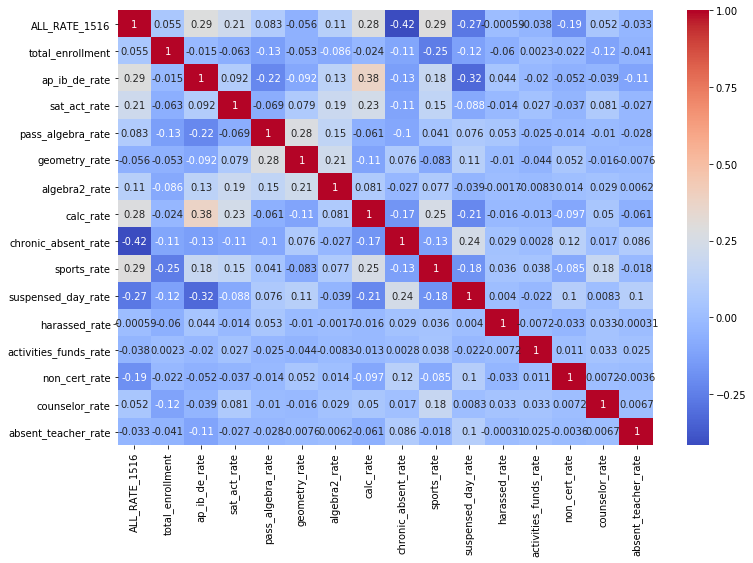

In [66]:
plt.figure(figsize = (12,8))
sns.heatmap(large_corr, cmap='coolwarm', annot = True)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


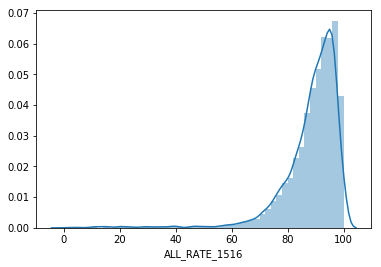

In [67]:
sns.distplot(large['ALL_RATE_1516'])

## Small Schools Model

Began to think about binning the schools to get more observations into the model. Small schools have multiple ranges based on the graduation class size. The number of schools for each range are: 

1,350 schools with 5 or fewer students

1,751 schools with 6-15 students

2,193 schools with 16-30 students

3,374 schools with 31-60 students

8,914 schools with 61-300 students

In [71]:
#Trying to build a model on small group with largest number of schools
small61 =small[(small['ALL_COHORT_1516'] <= 300) & (small['ALL_COHORT_1516']>60)]
small61.head()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,92,AL,ALABAMA,...,220.0,0.169884,78.0,0.060232,0.0,0.000000,2811.937359,0.0,0.003475,0.378788
1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,GE95,AL,ALABAMA,...,175.0,0.324675,10.0,0.018553,2.0,0.003711,4825.189777,0.0,0.002783,0.100000
2,2,2,ALABAMA,Marshall County,10000600878,Douglas High Sch,153,85-89,AL,ALABAMA,...,229.0,0.385522,18.0,0.030303,5.0,0.008418,5317.932795,0.0,0.001684,0.105263
3,3,3,ALABAMA,Marshall County,10000600883,Kate D Smith DAR High Sch,120,80-84,AL,ALABAMA,...,241.0,0.525054,10.0,0.021786,0.0,0.000000,5909.375686,0.0,0.002179,0.068966
4,4,4,ALABAMA,Marshall County,10000601585,Brindlee Mt High Sch,94,85-89,AL,ALABAMA,...,64.0,0.176309,8.0,0.022039,0.0,0.000000,3962.305785,0.0,0.002755,0.101010


In [73]:
#All the schools do not use the range option. Some report the exact graduation number. 
small61['ALL_RATE_1516'].unique()

array(['92', 'GE95', '85-89', '80-84', '90-94', '75-79', '90', '83', '95',
       '84', '87', '69', '77', '68', '75', '70-74', '81', '93', '88',
       '91', '98', '86', '85', '76', '79', '82', '78', '97', '96', '74',
       '60-64', '35-39', '65-69', '45-49', '30-34', '20-24', '40-44',
       '25-29', '50-54', 'LE5', '6-9', '55-59', '33', '10-14', '19', '67',
       'LE1', '94', '71', '15-19', 'GE99', '80', '89', '25', '18', '49',
       '50', '24', '52', '51', '62', '73', '53', '11', '46', '38', '30',
       '63', '10', '47', '48', '9', '13', '21', '5', '14', '8', '40',
       '55', '64', '54', '61', '72', '65', '59', '57', '42', '6', '20',
       '28', '36', '3', '4', '58', '70', '12', '23', '34', '27', '32',
       '60', '29', '56', '45', '39', '66', '41', '35', '37'], dtype=object)

In [74]:
small['ALL_RATE_1516'].nunique()

127

In [75]:
large.to_csv('large_schools.csv')
small.to_csv('small_schools.csv')
small61.to_csv('small61_schools.csv')

In [20]:
grad_100 = clean_combo[clean_combo['ALL_RATE_1516'] == 'GE99']

In [21]:
grad_100.head()

,Unnamed: 0,Unnamed: 0.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,LEA_STATE_NAME,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
1126,1126,1126,ARIZONA,Tucson Unified District,40880001441,University High School,210,GE99,AZ,ARIZONA,...,448.0,0.423041,0.0,0.000000,0.0,0.000000,189.089178,0.146444,0.001889,0.397490
1455,1455,1455,CALIFORNIA,Rocklin Unified,60001311010,Whitney High,455,GE99,CA,CALIFORNIA,...,937.0,0.482492,60.0,0.030896,7.0,0.003605,262.387791,0.000000,0.002060,0.260159
1457,1457,1457,CALIFORNIA,Hesperia Unified,60001405093,Sultana High,426,GE99,CA,CALIFORNIA,...,NaN,NaN,0.0,0.000000,0.0,0.000000,925.431232,0.000000,0.002567,0.287356
1478,1478,1478,CALIFORNIA,Pleasanton Unified,60002009279,Foothill High,482,GE99,CA,CALIFORNIA,...,1096.0,0.526164,60.0,0.028805,6.0,0.002880,1137.478108,0.017680,0.002880,0.232044
1591,1591,1591,CALIFORNIA,Alhambra Unified,60015310930,Mark Keppel High,535,GE99,CA,CALIFORNIA,...,667.0,0.290379,0.0,0.000000,0.0,0.000000,176.569961,0.000000,0.002612,0.219780


In [22]:
print('100%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_100.chronic_absent_rate.quantile([.25, .50, .75]))
print('100%+ Graduate Sports Rate (25th, 50th, 75th percentile):\n',grad_100.sports_rate.quantile([.25, .50, .75]))
print('100%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_100.suspensed_day_rate.quantile([.25, .50, .75]))
print('100%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_100.non_cert_rate.quantile([.25, .50, .75]))


100%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.059735
0.50    0.096090
0.75    0.143481
Name: chronic_absent_rate, dtype: float64
100%+ Graduate Sports Rate (25th, 50th, 75th percentile):
 0.25    0.364777
0.50    0.476052
0.75    0.651462
Name: sports_rate, dtype: float64
100%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.25    0.008866
0.50    0.028940
0.75    0.061694
Name: suspensed_day_rate, dtype: float64
100%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.25    0.0000
0.50    0.0000
0.75    0.0125
Name: non_cert_rate, dtype: float64


In [23]:
clean_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21867 entries, 0 to 21866
Columns: 101 entries, Unnamed: 0 to absent_teacher_rate
dtypes: float64(78), int64(8), object(15)
memory usage: 16.9+ MB


In [24]:
grad_99 = clean_combo[clean_combo['ALL_RATE_1516'] == '100']

In [25]:
grad_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 101 entries, Unnamed: 0 to absent_teacher_rate
dtypes: float64(78), int64(8), object(15)
memory usage: 0.0+ bytes
